In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Bootstrapping
 - The use of resampled data to perform statistical inference
 
### Bootstrap sample
 - A resampled array of the data

### Bootstrap replicate
 - A statistic computed ffrom a resampled array

### Resampling engine: np.random.choice()

In [2]:
np.random.choice([1, 2, 3, 4, 5], size=5)

array([4, 4, 5, 2, 1])

### Computing a bootstrap replicate

In [3]:
df = pd.read_csv('michelson_speed_of_light.csv', index_col=0)
df.head()

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


In [4]:
michelson_speed_of_light = df['velocity of light in air (km/s)'].values
michelson_speed_of_light[:5]

array([299850, 299740, 299900, 300070, 299930], dtype=int64)

In [5]:
bs_sample = np.random.choice(michelson_speed_of_light, size=100)
np.mean(bs_sample)

299856.2

In [6]:
np.median(bs_sample)

299850.0

In [7]:
np.std(bs_sample)

78.43188127285997

### Visualizing bootstrap samples

In [8]:
df = pd.read_csv('sheffield_weather_station.csv', comment='#', delimiter='\s+')
df.head(15)

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---
2,1883,3,4.8,-1.6,23,29.6,---
3,1883,4,12.2,3.8,2,74.0,---
4,1883,5,14.7,6.2,0,31.2,---
5,1883,6,17.7,9.3,0,66.2,---
6,1883,7,18.8,10.5,0,77.6,---
7,1883,8,19.8,10.9,0,32.5,---
8,1883,9,16.8,10.0,0,137.4,---
9,1883,10,12.7,6.4,0,102.9,---


In [9]:
df.tail(15)

,yyyy,mm,tmax,tmin,af,rain,sun
1587,2015,4,14.3,5.0,0,21.4,223.5
1588,2015,5,14.8,7.7,0,83.6,164.4
1589,2015,6,19.1,10.0,0,43.2,195.9
1590,2015,7,20.8,12.0,0,30.0,187.8
1591,2015,8,20.6,12.5,0,66.2,146.3
1592,2015,9,16.9,8.7,0,29.2,141.1
1593,2015,10,13.9,7.7,0,80.4,81.3
1594,2015,11,12.2,6.5,1,126.8,51.7
1595,2015,12,12.0,6.2,0,121.2,33.1
1596,2016,1,7.7,3.0,3,111.5,40.3


In [10]:
df = df[df['yyyy'] != 2016]

In [11]:
rainfall = df.groupby('yyyy')['rain'].sum().values
print(rainfall[:5])
print(len(rainfall))

[875.5 648.2 788.1 940.3 491.1]
133


In [12]:
# ECDF(Empirical cumulative distribution function)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

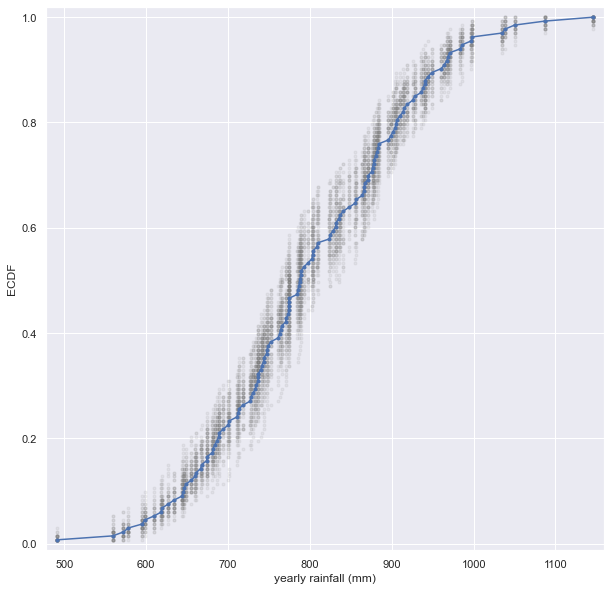

In [13]:
sns.set()
plt.figure(figsize=(10, 10))

for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
plt.xlabel('yearly rainfall (mm)')
plt.ylabel('ECDF')

# Show the plot
plt.show()

### Bootstrap replicate function

In [14]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [15]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299858.7

In [16]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299854.0

In [17]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299868.6

### Many bootstrap replicates

In [18]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [19]:
bs_replicates = draw_bs_reps(michelson_speed_of_light, np.mean, 10000)

### Plotting a histogram of bootstrap replicates

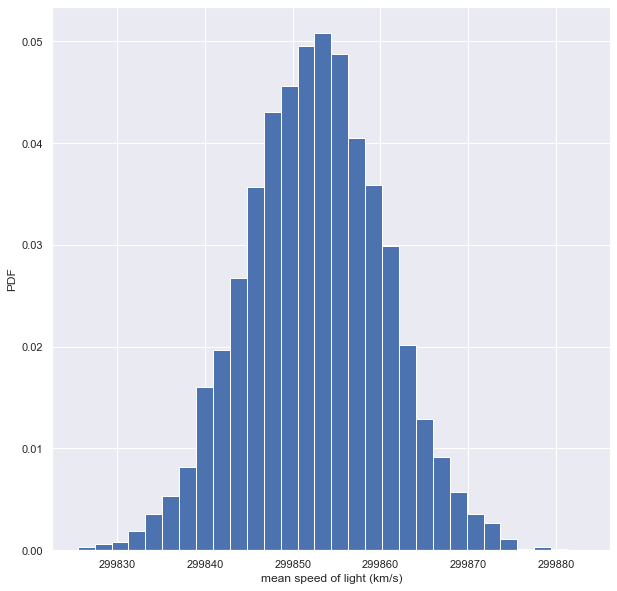

In [20]:
plt.figure(figsize=(10, 10))
plt.hist(bs_replicates, bins=30, density=True)
plt.xlabel('mean speed of light (km/s)')
plt.ylabel('PDF')
plt.ticklabel_format(style='plain', useOffset=False)  # to prevent scientific notation.

plt.show()

### Bootstrap confidence interval

In [21]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([299837.2, 299868. ])

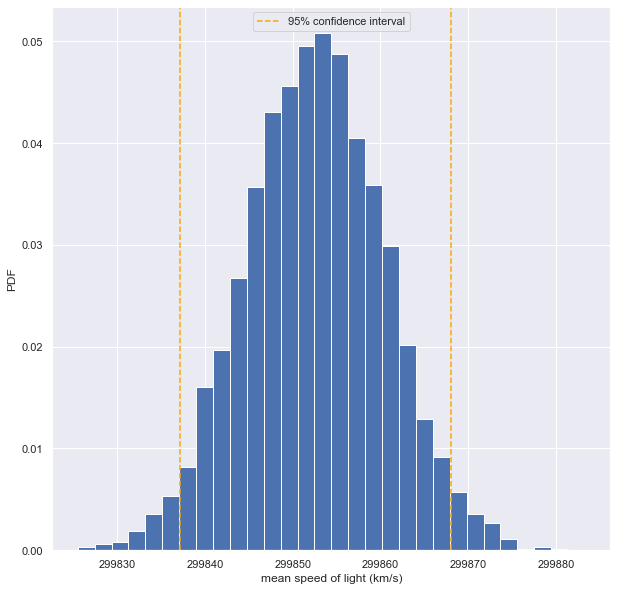

In [22]:
plt.figure(figsize=(10, 10))
plt.hist(bs_replicates, bins=30, density=True)
plt.xlabel('mean speed of light (km/s)')
plt.ylabel('PDF')
plt.ticklabel_format(style='plain', useOffset=False)  # to prevent scientific notation.

# confidence interval
plt.axvline(x=conf_int[0], color='orange', linestyle='--', label='95% confidence interval')
plt.axvline(x=conf_int[1], color='orange', linestyle='--')

plt.legend()
plt.show()

### Bootstrap replicates of the mean and the SEM (Standard Error of the Mean)

10.510549150506188
10.464355835449998


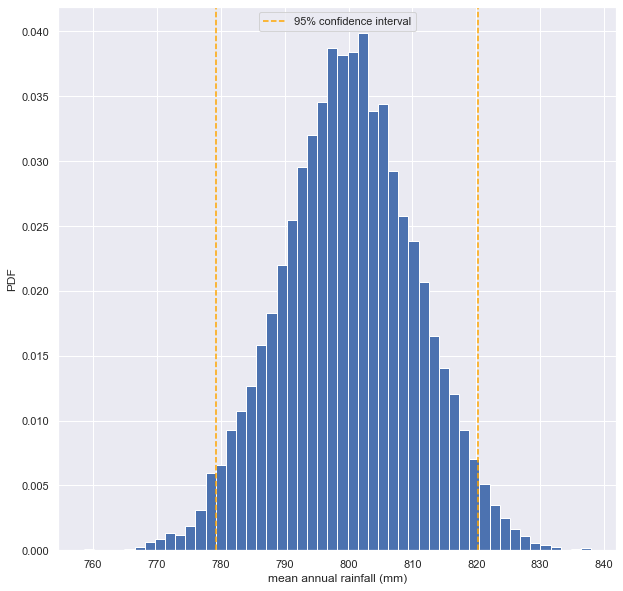

In [23]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
plt.figure(figsize=(10, 10))
plt.hist(bs_replicates, bins=50, density=True)
plt.xlabel('mean annual rainfall (mm)')
plt.ylabel('PDF')

# confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
plt.axvline(x=conf_int[0], color='orange', linestyle='--', label='95% confidence interval')
plt.axvline(x=conf_int[1], color='orange', linestyle='--')

# Show the plot
plt.legend()
plt.show()

### Bootstrap replicates of other statistics

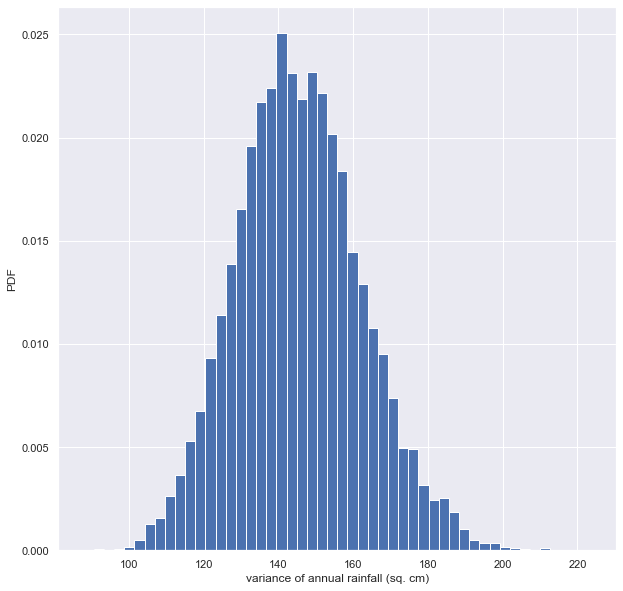

In [24]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Make a histogram of the results
plt.figure(figsize=(10, 10))
plt.hist(bs_replicates, bins=50, density=True)
plt.xlabel('variance of annual rainfall (sq. cm)')
plt.ylabel('PDF')

# Show the plot
plt.show()

### Confidence interval on the rate of no-hitters

In [25]:
df = pd.read_csv('mlb_nohitters.csv', parse_dates=['date'], index_col='date')
nohitter_games = df.loc['1900-01-01':]['game_number'].values

nohitter_times = []
for i in range(len(nohitter_games)-1):
    nohitter_times.append(nohitter_games[i+1] - nohitter_games[i] - 1)  
nohitter_times = np.array(nohitter_times)
print(len(nohitter_times))
print(nohitter_times[:5])

251
[ 843 1613 1101  215  684]


95% confidence interval = [661.50448207 868.66723108] games


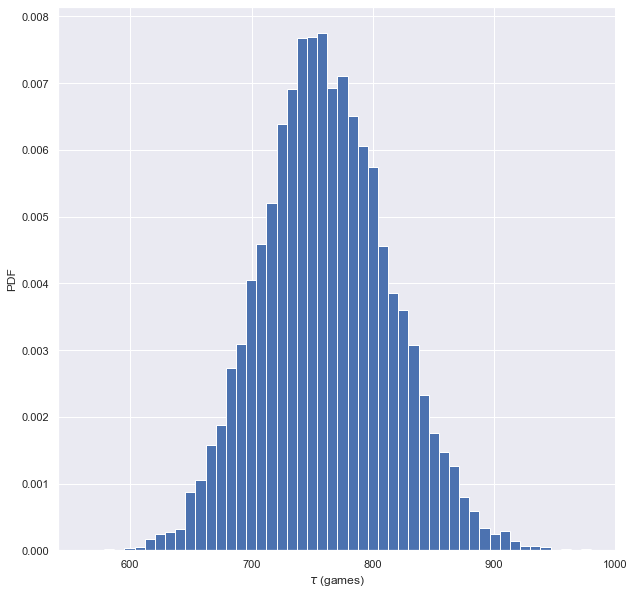

In [26]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
plt.figure(figsize=(10, 10))
plt.hist(bs_replicates, bins=50, density=True)
plt.xlabel(r'$\tau$ (games)')
plt.ylabel('PDF')

# Show the plot
plt.show()

### Pairs bootstrap for linear regression
 - Resample data in pairs
 - Compte slope and intercept from resampled data
 - Each slope and intercept is a bootstrap replicate
 - Compute confidence intervals from percentiles of bootstrap replicates

### Generating a pairs bootstrap sample

In [27]:
df_swing = pd.read_csv('2008_swing_states.csv')
total_votes = df_swing['total_votes'].values
dem_share = df_swing['dem_share'].values

In [28]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [29]:
inds = np.arange(len(total_votes))
bs_inds = np.random.choice(inds, len(inds))
bs_total_votes = total_votes[bs_inds]
bs_dem_share = dem_share[bs_inds]

### Computing a pairs bootstrap replicate

In [30]:
bs_slope, bs_intercept = np.polyfit(bs_total_votes, bs_dem_share, 1)
bs_slope, bs_intercept

(4.027782822278699e-05, 40.24185516790969)

In [31]:
np.polyfit(total_votes, dem_share, 1)  # fit of original

array([4.0370717e-05, 4.0113912e+01])

### A function to do pairs bootstrap

In [32]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

### Pairs bootstrap of 2008 swing states data

[3.27419372e-05 4.96719429e-05]


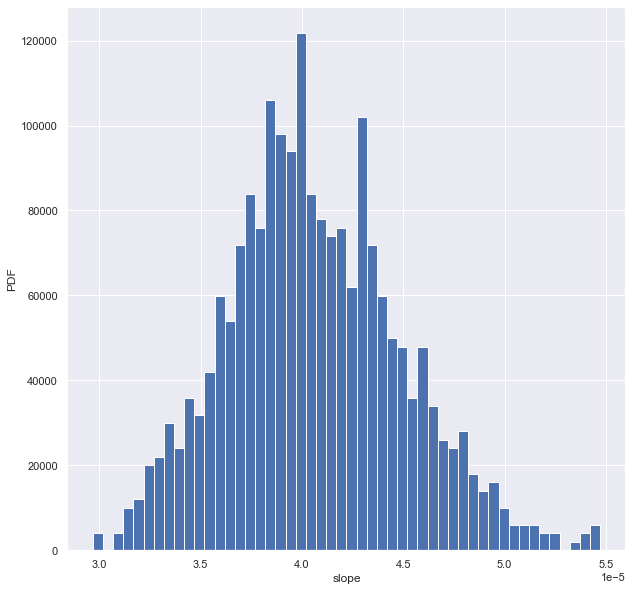

In [33]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(total_votes, dem_share, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
plt.figure(figsize=(10, 10))
plt.hist(bs_slope_reps, bins=50, density=True)
plt.xlabel('slope')
plt.ylabel('PDF')
plt.show()

### Plotting bootstrap regressions

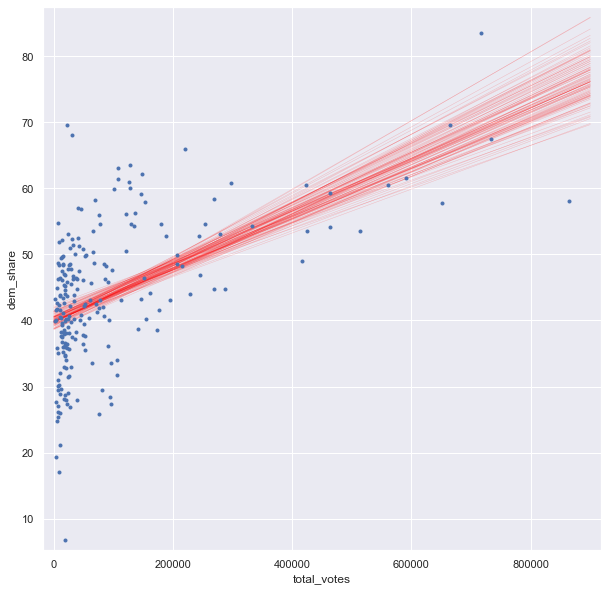

In [34]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 900000])

# Plot the bootstrap lines
plt.figure(figsize=(10, 10))

for i in range(100):
    plt.plot(x, 
             bs_slope_reps[i]*x + bs_intercept_reps[i],
             linewidth=0.5, alpha=0.2, color='red')

# Plot the data
plt.plot(total_votes, dem_share, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
plt.xlabel('total_votes')
plt.ylabel('dem_share')
plt.margins(0.02)
plt.show()

### Pairs bootstrap of literacy/fertility data

In [35]:
df = pd.read_csv('female_literacy_fertility.csv')
fertility = df['fertility']
illiteracy = 100 - df['female literacy']

[0.04400699 0.05548848]


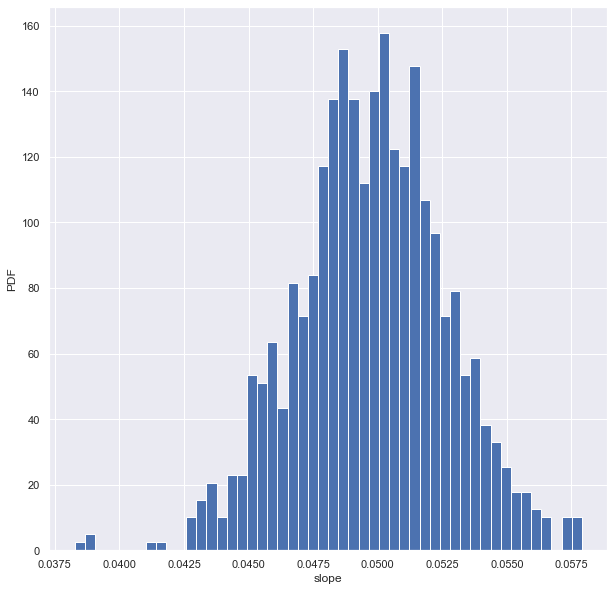

In [36]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
plt.figure(figsize=(10, 10))
plt.hist(bs_slope_reps, bins=50, density=True)
plt.xlabel('slope')
plt.ylabel('PDF')
plt.show()

### Plotting bootstrap regressions

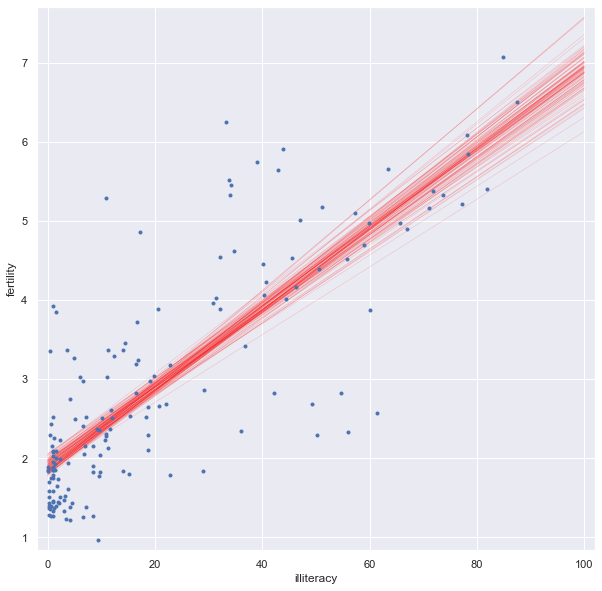

In [37]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
plt.figure(figsize=(10, 10))

for i in range(100):
    plt.plot(x, 
             bs_slope_reps[i]*x + bs_intercept_reps[i],
             linewidth=0.5, alpha=0.2, color='red')

# Plot the data
plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
plt.xlabel('illiteracy')
plt.ylabel('fertility')
plt.margins(0.02)
plt.show()